In [3]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from voltagebudget.exp import sparse_sweep_A
from voltagebudget.neurons import adex
from voltagebudget.util import read_results
from voltagebudget.util import read_stim
from voltagebudget.util import read_args
from voltagebudget.util import read_modes
from voltagebudget.util import nearest_spike
from voltagebudget.util import write_spikes
from voltagebudget.util import locate_firsts
from voltagebudget.util import filter_spikes
from voltagebudget.util import budget_window
from voltagebudget.util import locate_peaks
from voltagebudget.util import write_spikes
from voltagebudget.util import write_voltages
from voltagebudget.util import mad
from voltagebudget.util import mae
from voltagebudget.util import select_n
from voltagebudget.util import score_by_group
from voltagebudget.util import score_by_n
from voltagebudget.util import find_E
from voltagebudget.util import find_phis

# Config

In [4]:
stim = "../../data/stim3.csv"
mode = "regular"

N = 10
time = 1.0
time_step = 1e-5

E_0 = 0
f = 8
A_max = 0.05e-9
T = 0.125

w_in = (3e-10, 3e-9)

In [5]:
stim_data = read_stim(stim)
ns_stim = np.asarray(stim_data['ns'])
ts_stim = np.asarray(stim_data['ts'])

# Run

In [6]:
results = sparse_sweep_A("testing",
                   stim,
                   E_0,
                   A_0=0.00e-9,
                   A_max=A_max,
                   Z=0.0,
                   n_samples=10,
                   t=0.4,
                   t_pad=0,
                   d=-2e-3,
                   w=2e-3,
                   T=T,
                   f=f,
                   N=250,
                   n_cycles=2,
                   mode='regular',
                   sigma=0,
                   sparse_threshold=.1,
                   g_l=None,
                   V_l=None,
                   w_in_0=w_in[0],
                   w_in_max=w_in[1],
                   no_lock=False,
                   verbose=True,
                   save_only=False,
                   save_spikes=True,
                   save_traces=True,
                   seed_value=42)

>>> Setting mode.
>>> Importing stimulus from ../../data/stim3.csv.
>>> Creating reference spikes.


WARNING    "bias_in" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 5e-11. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "a" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([1.97490802e-09, 2.09014286e-09, 2.04639879e-09, ...,
       2.09333096e-09, 2.09272400e-09, 2.07060189e-09]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "C" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 2e-10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_l" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 1e-08. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "V_l" is an int

>>> Locking on first spike. E was [0.02767].
>>> phi_w 0.28048139211249645, phi_E -1.3908458995972734
>>> 940 spikes in the analysis window.
>>> sparse_threshold: 0.1.
>>> I_osc_index: [9, 12, 33, 35, 50, 62, 67, 69, 92, 104, 118, 120, 121, 127, 150, 154, 157, 159, 174, 183, 186, 199, 220, 226, 247]
>>> V_comps (filtered): [0.00573262 0.00573596 0.00574635 0.00574344 0.00575116 0.0057455
 0.00573152 0.00573532 0.00572923 0.00574605 0.00573464 0.00573787
 0.00574992 0.00574749 0.0057433  0.00572955 0.00574296 0.00573424
 0.00573241 0.00574174 0.00574079 0.00573779 0.00573696 0.00574944
 0.00574874]
>>> V_comps (first 10): [0.00569836 0.00572245 0.00567655 0.00570881 0.00569602 0.00566735
 0.00563699 0.00569439 0.00568979 0.00573262 0.0056562  0.00567893
 0.00573596 0.00567305 0.00564699 0.00565611 0.00566531 0.00567632
 0.0056965  0.00569389 0.00567334 0.00564924 0.00565324 0.00565394
 0.00568645 0.0057046  0.00565309 0.00567949 0.00567984 0.00564544
 0.00566761 0.00568398 0.00567549 0.

WARNING    "bias_in" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 5e-11. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "a" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([1.97490802e-09, 2.09014286e-09, 2.04639879e-09, ...,
       2.09333096e-09, 2.09272400e-09, 2.07060189e-09]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "C" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 2e-10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_l" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 1e-08. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "V_l" i

>>> (A 0.000000000000)  ->  (N spks, 3.76, mae 0.00000, mad, 0.03256)
>>> Writing details for A 0.0 (nA)


KeyboardInterrupt: 

In [ ]:
results.keys()

# Visualize

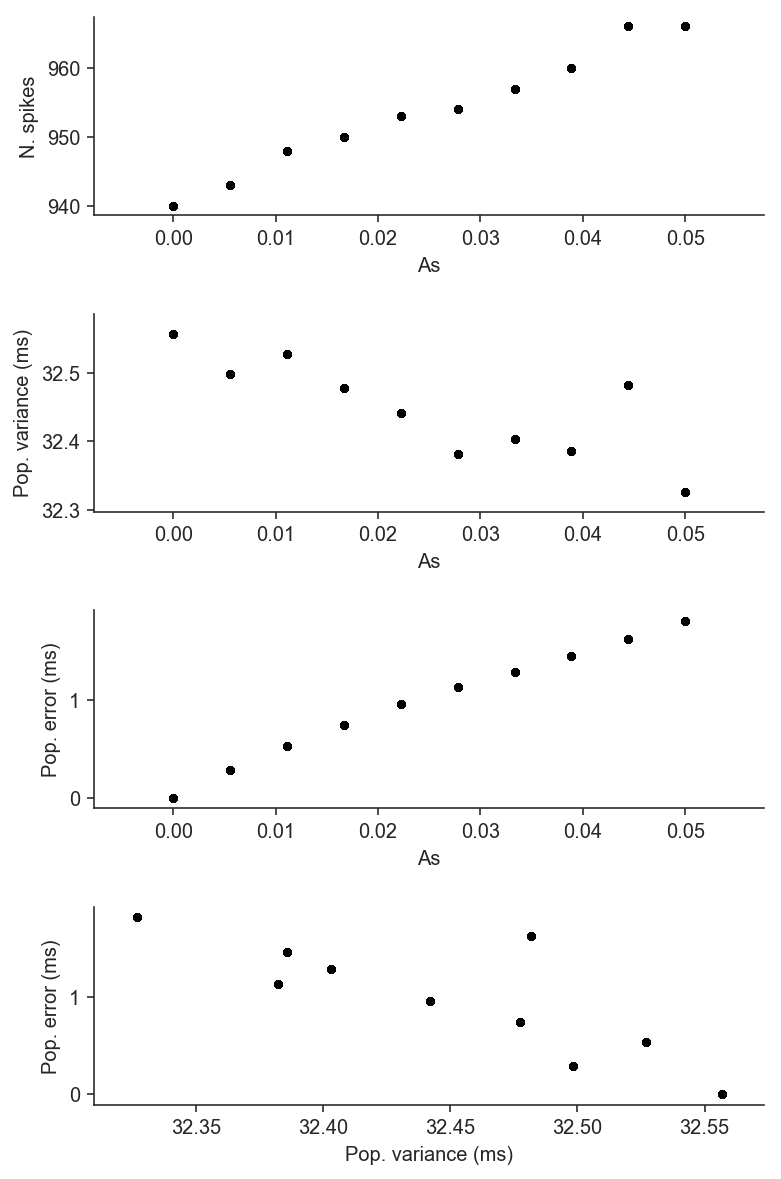

In [9]:
# Plotz
fig = plt.figure(figsize=(6, 10))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.5)

# Spikes
plt.subplot(grid[0, 0])
plt.scatter(
    np.asarray(results["As"])*1e9, 
    np.asarray(results["n_spikes_pop"]), 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("N. spikes")
plt.xlabel("As")

plt.subplot(grid[1, 0])
plt.scatter(
    np.asarray(results["As"])*1e9, 
    np.asarray(results["variances_pop"])*1e3, 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("Pop. variance (ms)")
plt.xlabel("As")

plt.subplot(grid[2, 0])
plt.scatter(
    np.asarray(results["As"])*1e9, 
    np.asarray(results["errors_pop"])*1e3, 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("Pop. error (ms)")
plt.xlabel("As")

plt.subplot(grid[3, 0])
plt.scatter(
    np.asarray(results["variances_pop"])*1e3, 
    np.asarray(results["errors_pop"])*1e3, 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("Pop. error (ms)")
plt.xlabel("Pop. variance (ms)")
sns.despine()